 ## CyberRisk Atlas: AI-Powered Global Threat Analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


In [2]:
df=pd.read_csv('Cyber_security.csv')
df.head()

,Country,Region,CEI,GCI,NCSI,DDL
0,Afghanistan,Asia-Pasific,1.000,5.20,11.69,19.50
1,Albania,Europe,0.566,64.32,62.34,48.74
2,Algeria,Africa,0.721,33.95,33.77,42.81
3,Andorra,Europe,NaN,26.38,NaN,NaN
4,Angola,Africa,NaN,12.99,9.09,22.69


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  192 non-null    object 
 1   Region   192 non-null    object 
 2   CEI      108 non-null    float64
 3   GCI      190 non-null    float64
 4   NCSI     167 non-null    float64
 5   DDL      152 non-null    float64
dtypes: float64(4), object(2)
memory usage: 9.1+ KB


In [4]:
df.isnull().sum()

Country     0
Region      0
CEI        84
GCI         2
NCSI       25
DDL        40
dtype: int64

In [5]:
df = df.dropna(subset=['CEI'])


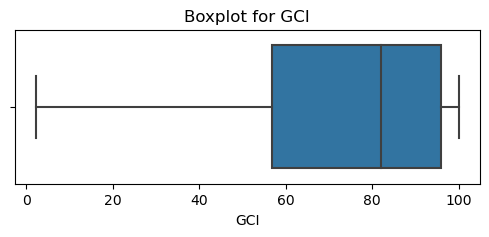

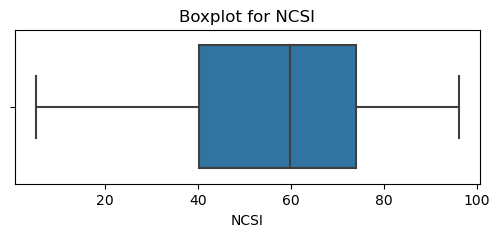

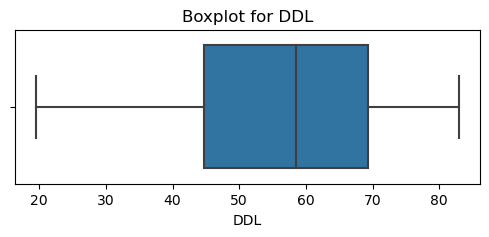

In [6]:
numeric_cols = ['GCI', 'NCSI', 'DDL']

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [7]:
df['GCI'] = df['GCI'].fillna(df['GCI'].mean())
df['NCSI'] = df['NCSI'].fillna(df['NCSI'].mean())
df['DDL'] = df['DDL'].fillna(df['DDL'].mean())


In [8]:
df.isnull().sum()

Country    0
Region     0
CEI        0
GCI        0
NCSI       0
DDL        0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Region_encoded'] = le.fit_transform(df['Region'])


In [10]:
from sklearn.preprocessing import StandardScaler
features_to_scale = ['GCI', 'NCSI', 'DDL']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [11]:
from sklearn.model_selection import train_test_split


X = df[['GCI', 'NCSI', 'DDL', 'Region_encoded']]
y = df['CEI']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,     
    random_state=42   
)


In [12]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = XGBRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


results:
Mean Squared Error (MSE): 0.0101
R² Score: 0.8195


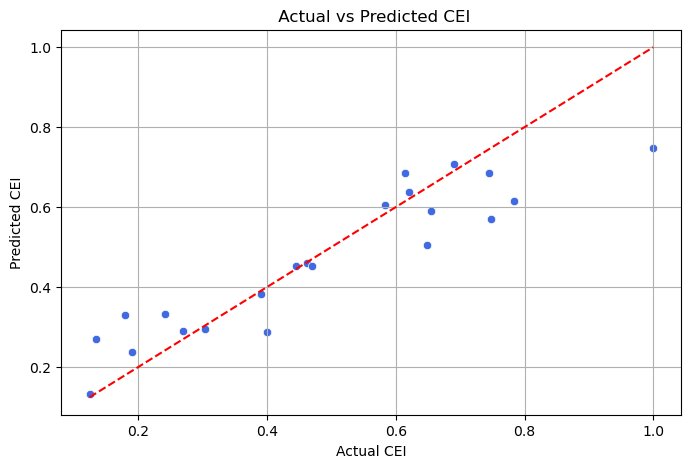

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual CEI')
plt.ylabel('Predicted CEI')
plt.title(' Actual vs Predicted CEI')
plt.grid(True)
plt.show()


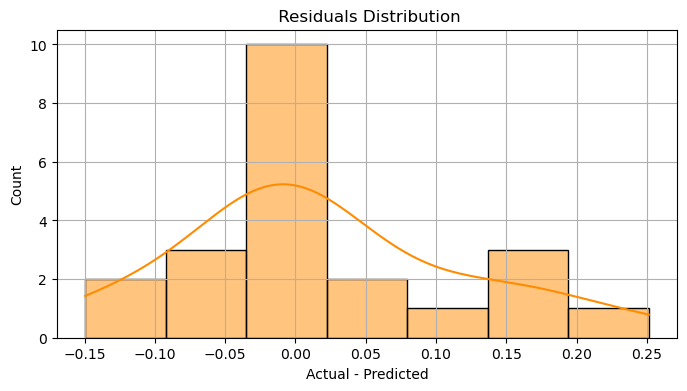

In [14]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, color='darkorange')
plt.title(" Residuals Distribution")
plt.xlabel("Actual - Predicted")
plt.grid(True)
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


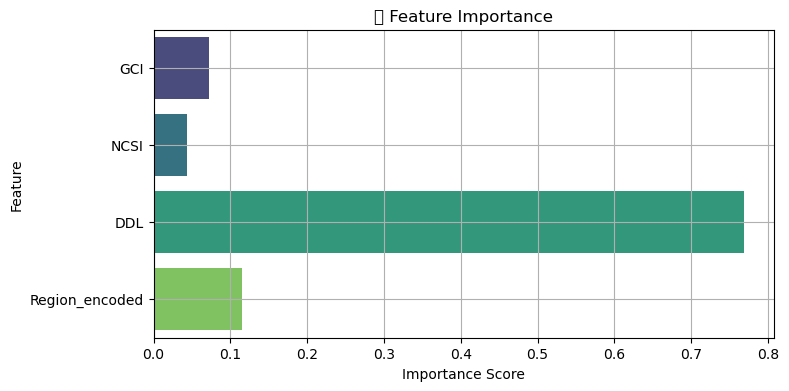

In [15]:
feature_names = X_train.columns
importances = model.feature_importances_

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title("📌 Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.show()


In [16]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="CEI",
    hover_name="Country",
    color_continuous_scale="Reds",
    title="Cybersecurity Exposure Index Around the World"
)

fig.show()


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



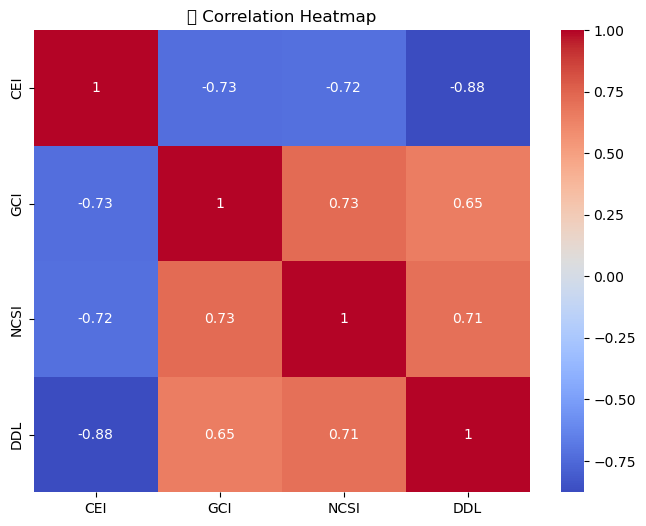

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['CEI', 'GCI', 'NCSI', 'DDL']].corr(), annot=True, cmap='coolwarm')
plt.title("📊 Correlation Heatmap")
plt.show()


In [18]:
df['CEI_class'] = df['CEI'].apply(lambda x: 1 if x >= 0.5 else 0)


In [19]:
df['CEI_class'].value_counts()


0    57
1    51
Name: CEI_class, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X = df[['GCI', 'NCSI', 'DDL', 'Region_encoded']]
y_class = df['CEI_class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)


In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = XGBClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_class = clf.predict(X_test)


In [22]:
acc = accuracy_score(y_test, y_pred_class)
prec = precision_score(y_test, y_pred_class)
rec = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print("Classification Results:")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")


Classification Results:
Accuracy  : 0.9545
Precision : 1.0000
Recall    : 0.9000
F1 Score  : 0.9474


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



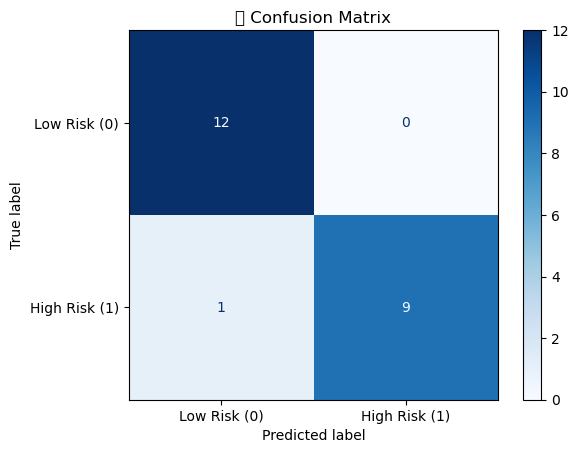

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred_class)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Risk (0)', 'High Risk (1)'])
disp.plot(cmap='Blues')
plt.title("📊 Confusion Matrix")
plt.grid(False)
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.



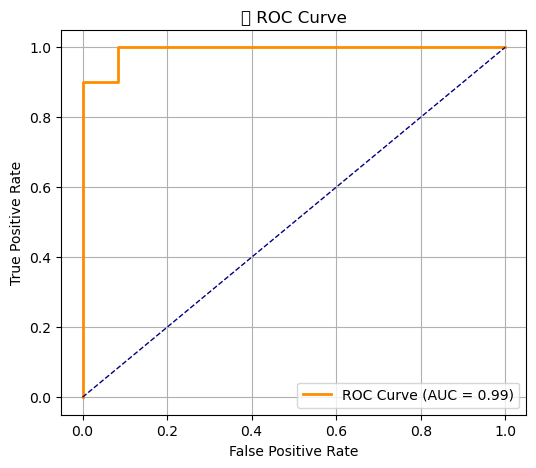

In [24]:
clf = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.1, random_state=42)
clf.fit(X_train, y_train)  

y_probs = clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🔵 ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [25]:
sample = X_test.iloc[[5]]

true_value = y_test.iloc[5]


In [32]:
predicted_class = clf.predict(sample)[0] 

In [34]:
predicted_prob = clf.predict_proba(sample)[0][1]  

print(" Sample Input Data:")
print(sample)

print("\n Model Prediction:")
print(f"Predicted Class: {'High Risk (1)' if predicted_class == 1 else 'Low Risk (0)'}")
print(f"True Class     : {'High Risk (1)' if true_value == 1 else 'Low Risk (0)'}")
print(f"Confidence     : {predicted_prob:.2f} probability of being High Risk")


 Sample Input Data:
          GCI      NCSI       DDL  Region_encoded
120  0.413097 -0.241381  1.222184               1

 Model Prediction:
Predicted Class: Low Risk (0)
True Class     : Low Risk (0)
Confidence     : 0.10 probability of being High Risk


In [44]:
sample = X_test.iloc[[10]]       
true_cei = y_test.iloc[10]       

predicted_cei = model.predict(sample)[0] 

print('Input Features:')
print(sample)

print(f"\n Predicted CEI: {predicted_cei:.3f}")


Input Features:
          GCI      NCSI       DDL  Region_encoded
138  0.133055  1.444823  0.186147               2

 Predicted CEI: 0.460


In [47]:
pip install streamlit



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
